['../logs/main/ResNet18/CIFAR10/Hessian/0.1/42/0.99/20250209233427/test/final_weight', '../logs/main/ResNet18/CIFAR10/L1/0.1/42/0.99/20250209211333/test/final_weight', '../logs/main/ResNet18/CIFAR10/HessianParam/0.1/42/0.99/20250209232459/test/final_weight', '../logs/main/ResNet18/CIFAR10/None/0.1/42/0.0/20250209091815/test/final_weight']
{'clean': [65.59, 37.74, 90.75, 95.13], 'brightness': [64.208, 36.828, 88.88, 93.98], 'contrast': [48.434, 20.078, 65.598, 78.306], 'defocus_blur': [53.532, 23.474, 77.012, 83.324], 'elastic_transform': [54.962, 26.32, 76.978, 85.36], 'fog': [57.702, 24.604, 79.666, 88.902], 'frost': [47.426, 33.692, 68.496, 78.996], 'gaussian_blur': [46.384, 21.392, 68.214, 74.836], 'gaussian_noise': [21.104, 23.42, 39.552, 44.252], 'glass_blur': [28.04, 29.854, 46.11, 53.916], 'impulse_noise': [37.346, 22.036, 51.252, 51.93], 'jpeg_compression': [56.658, 34.432, 71.726, 80.022], 'motion_blur': [49.074, 22.958, 67.68, 78.116], 'pixelate': [48.818, 32.668, 63.344, 75.

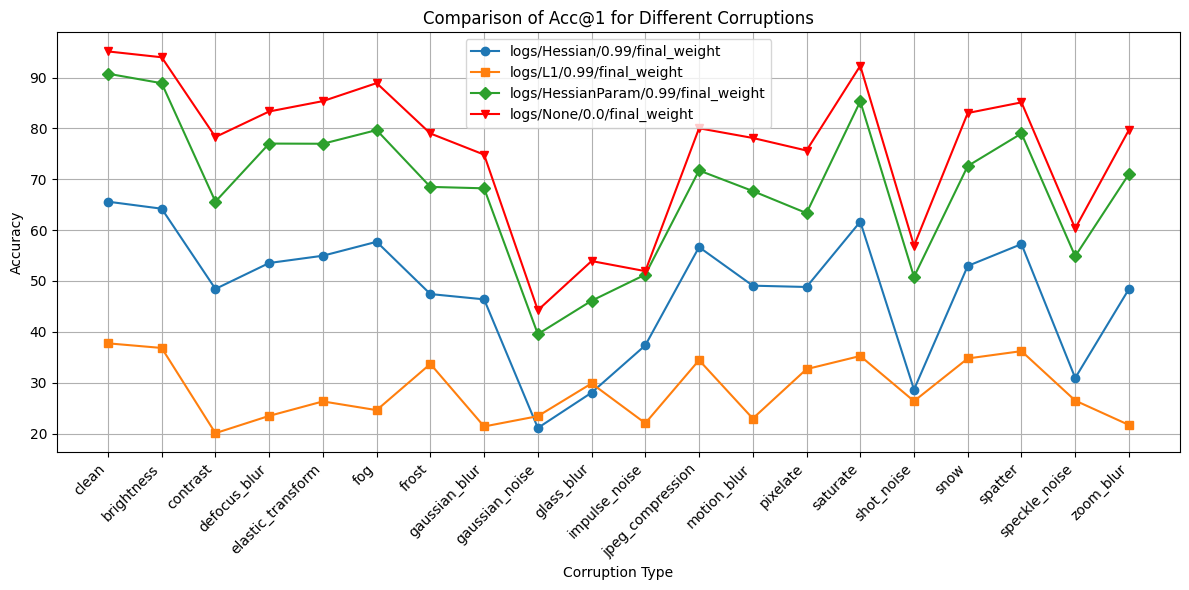

In [9]:
import matplotlib.pyplot as plt
import os
import glob
Acc1_dict = {'clean': [], 'brightness': [], 'contrast': [], 'defocus_blur': [], 'elastic_transform': [], 'fog': [], 'frost': [], 'gaussian_blur': [], 'gaussian_noise': [], 'glass_blur': [],
             'impulse_noise': [], 'jpeg_compression': [], 'motion_blur': [], 'pixelate': [], 'saturate': [], 'shot_noise': [], 'snow': [], 'spatter': [], 'speckle_noise': [], 'zoom_blur': []}
# paths = ['logs/debug/ResNet18/CIFAR10/L1/0.0001/42/0.5/20250109110709/test/100', 'logs/debug/ResNet18/CIFAR10/Hessian/0.0001/42/0.5/20250109131035/test/100', 'logs/debug/ResNet18/CIFAR10/None/0.0001/42/0.5/20250109151522/test/final_weight']
paths = glob.glob('../logs/main/ResNet18/CIFAR10/*/0.1/42/0.99/*/test/final_weight')
paths.append('../logs/main/ResNet18/CIFAR10/None/0.1/42/0.0/20250209091815/test/final_weight')
print(paths)
for path in paths:
    with open(os.path.join(path, 'total_result.txt')) as f:
        lines = f.readlines()
    # Acc1 = []
    for line in lines:
        line = line.split(' ')
        # Add the accuracy to the corresponding list
        Acc1_dict[line[1].strip('*')].append(float(line[line.index('Acc@1') + 1]))
Acc1_dict = {k: v for k, v in Acc1_dict.items() if v}
print(Acc1_dict)
# Plot Accuracy and save figure
# xlabel is Acc1_dict key and ylabel is Acc1_dict value
x_labels = list(Acc1_dict.keys())
markars = ['o', 's', 'D', 'v', '^', '<', '>', 'p', 'P', '*', 'h', 'H', '+', 'x', 'X', 'D', 'd', '|', '_']
plt.figure(figsize=(12, 6))
for i in range(len(Acc1_dict[list(Acc1_dict.keys())[0]])-1):
    y_values = [Acc1_dict[key][i] for key in x_labels]
    plt.plot(x_labels, y_values, marker=markars[i], label=(paths[i].split('/')[1]+'/'+paths[i].split('/')[-7]+'/'+paths[i].split('/')[-4]+'/'+paths[i].split('/')[-1]), linestyle='-')
y_values = [Acc1_dict[key][i+1] for key in x_labels]
plt.plot(x_labels, y_values, marker=markars[i+1], label=(paths[i+1].split('/')[1]+'/'+paths[i+1].split('/')[-7]+'/'+paths[i+1].split('/')[-4]+'/'+paths[i+1].split('/')[-1]), color='r', linestyle='-')

plt.xlabel('Corruption Type')
plt.ylabel('Accuracy')
plt.title('Comparison of Acc@1 for Different Corruptions')
plt.xticks(rotation=45, ha='right')
plt.legend()
plt.grid()
plt.tight_layout()

plt.savefig('corruption_comparison.png')
plt.show()

In [10]:
print(Acc1_dict)
acc_list = [0.0 for _ in range(Acc1_dict['clean'].__len__())]
for key in Acc1_dict.keys():
    if key == 'clean':
        continue
    for i in range(Acc1_dict[key].__len__()):
        acc_list[i] += Acc1_dict[key][i]
# 平均ほしい
acc_list = [acc / 19 for acc in acc_list]
for i in range(len(Acc1_dict[list(Acc1_dict.keys())[0]])):
    print('/'+paths[i].split('/')[-7]+'/'+paths[i].split('/')[-4]+'/'+paths[i].split('/')[-1], acc_list[i])

{'clean': [65.59, 37.74, 90.75, 95.13], 'brightness': [64.208, 36.828, 88.88, 93.98], 'contrast': [48.434, 20.078, 65.598, 78.306], 'defocus_blur': [53.532, 23.474, 77.012, 83.324], 'elastic_transform': [54.962, 26.32, 76.978, 85.36], 'fog': [57.702, 24.604, 79.666, 88.902], 'frost': [47.426, 33.692, 68.496, 78.996], 'gaussian_blur': [46.384, 21.392, 68.214, 74.836], 'gaussian_noise': [21.104, 23.42, 39.552, 44.252], 'glass_blur': [28.04, 29.854, 46.11, 53.916], 'impulse_noise': [37.346, 22.036, 51.252, 51.93], 'jpeg_compression': [56.658, 34.432, 71.726, 80.022], 'motion_blur': [49.074, 22.958, 67.68, 78.116], 'pixelate': [48.818, 32.668, 63.344, 75.646], 'saturate': [61.654, 35.25, 85.314, 92.314], 'shot_noise': [28.654, 26.37, 50.814, 56.914], 'snow': [52.954, 34.764, 72.602, 83.02], 'spatter': [57.252, 36.206, 78.998, 85.114], 'speckle_noise': [30.93, 26.486, 54.862, 60.336], 'zoom_blur': [48.424, 21.688, 71.02, 79.702]}
/Hessian/0.99/final_weight 47.02926315789472
/L1/0.99/final_w